# Regularized Logistic Regression

This script implements a regularized logistic regression model to predict if a person has a heart disease based on a dataset containing some relevant information about the person's health.

Part 1 contains a binary classifier and part 2 contains a multiclass classifier

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Array with the relevant features
relevant_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]
print("Number of relevant features: ", len(relevant_features))

# Import the dataset
data = pd.read_csv("processed.cleveland.csv", names=relevant_features)

# Some of the data points might be unknown, represented with a '?'. Remove those unknown data samples.
for i in range(len(data.columns)):
    data.drop(data[data[relevant_features[i]] == '?'].index, inplace=True)

data = data.astype('float64') 

Number of relevant features:  14


## Part 1 - Binary Classification
The dataset has 4 possible diseases, represented as integers ranging from 1 to 4.
In this part, all the different diseases are considered as the same and the classification is performed in a binary manner, i.e. 0 represents absence of disease and 1 represents presence of disease.

In [3]:
# Array with binary data (disease or not disease)
data_binary = data.copy()
data_binary["diagnosis"] = data_binary.diagnosis.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data_binary.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

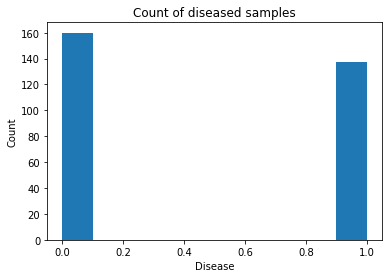

In [4]:
data_binary_n = data_binary.values
#print(data_binary_n.shape)

# Extract the features to array X
X_binary = data_binary_n[:,:-1]

# Extract the labels to array y
y_binary = data_binary_n[:,-1]
y_binary = y_binary.reshape(len(y_binary), 1)

#print(X_binary.shape)
#print(y_binary.shape)

# Plot the count of diseases
plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_binary)

In [5]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean= np.mean(X,axis=0)
    std= np.std(X,axis=0)
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

In [6]:
# Normalize the features
X_binary_norm, X_binary_mean, X_binary_std = featureNormalization(X_binary)
#print(X_binary_norm.shape)

In [7]:
def sigmoid(z):
    """
    return the sigmoid of z
    """

    gz=1/(1+np.exp(-z))
    
    return gz

In [8]:
 def costFunctionReg(X, y, theta, Lambda):
    """
    Take in numpy array of  data X, labels y and theta, to return the regularized cost function and gradients
    of the logistic regression classifier
    """
    
    #number of training examples 
    m=len(y)
        
    #vector of the model predictions for all training examples      
    h = sigmoid(np.dot(X, theta))
    
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    
    #cost function without regularization term
    cost = sum(error)/m
    
    #add regularization term to the cost function
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    #gradient of theta_0
    grad_0= (1/m) * np.dot(X.transpose(),(h - y))[0]
    
    #vector of gradients of theta_j from j=1:n (adding the regularization term of the gradient)
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
       
    # all gradients in a column vector shape
    grad_all=np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))
    
    return regCost[0], grad_all

In [9]:
# Initialize theta with zeros
initial_theta_binary = np.zeros((X_binary_norm.shape[1],1))
#print(initial_theta_binary.shape)

# Initialize lambda (regularization parameter) with zero
    # Small lambda -> low bias and high variance
    # High lambda  -> high bias and low variance
Lambda = 0

# Compute the cost function
cost, grad = costFunctionReg(X_binary_norm, y_binary, initial_theta_binary, Lambda)

print("Cost for initial theta is",round(cost,3) )

Cost for initial theta is 0.693


In [10]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    J_history =[]
    
    for i in range(num_iters):
        
        #call CostFunctionReg 
        cost, grad = costFunctionReg(X, y, theta, Lambda)
        
        #update theta
        theta = theta - (alpha*grad)
        
        J_history.append(cost)
    
    return theta , J_history

In [11]:
Lambda = 0
alpha = 0.5

# Number of iterations
iterat = 100

# Initialize theta with zeros
initial_theta_binary = np.zeros((X_binary_norm.shape[1],1))

# Compute the model parameters with gradient descent
theta_binary , J_history = gradientDescent(X_binary_norm, y_binary, initial_theta_binary, alpha, iterat, Lambda)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

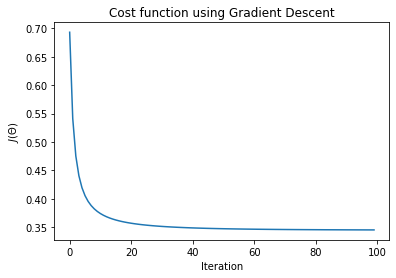

In [12]:
# Plot the evolution of the cost function to see if it converges
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [13]:
def classifierAccuracy(X, y, theta):
    """
    take in numpy array of X, y and theta, and compute the accuracy of the classifier 
    """
    h = np.dot(X, theta)
    
    acc = (sum((h>0)==y)/len(y)*100)[0]
    
    return acc

In [14]:
# Compute the accuracy of the classifier
acc = classifierAccuracy(X_binary_norm, y_binary, theta_binary)

print("Train Accuracy:", acc, "%") 

Train Accuracy: 84.51178451178451 %


In [15]:
def classifierPredict(X, theta):
    """
    take in numpy array of X and theta, and predict the class
    """
    prob = sigmoid(np.dot(X, theta))
    
    if prob > 0.5:
        predClass = 1
    else:
        predClass = 0
    
    return predClass

In [16]:
# Array with the input features
X_binary_test = np.array([62.0, 1.0, 4.0, 130.0, 254.0, 0.0, 2.5, 147.0, 0.0, 0.4, 2.0, 1.0, 7.0])
X_binary_test = X_binary_test.reshape(1, len(X_binary_test))

#Normalize the values
X_binary_test = (X_binary_test - X_binary_mean)/X_binary_std

#Compute the prediction
pred = classifierPredict(X_binary_test, theta_binary)
print("Predicted class: ", pred)


Predicted class:  1


## Model validation - training, cross validation and testing
In this section, we divide the dataset in three subsets: train set, cross validation set and test set.
The purpose of these subsets is to first train the model, then validate if the model performs well with unknown data and finally test the model.
At the end, we compute the best regularization parameter $\lambda$.

In [17]:
# Divide the dataset into three subsets: train (60%), validation (20%) and test (20%). Then normalize each subset examples.

X_binary_train = X_binary[0:math.floor(X_binary.shape[0]*0.60),:]
y_binary_train = y_binary[0:math.floor(y_binary.shape[0]*0.60),:]
X_binary_train_norm, X_binary_train_mean, X_binary_train_std = featureNormalization(X_binary_train)
#print(X_binary_train_norm.shape)
#print(y_binary_train.shape)

X_binary_val = X_binary[0:math.floor(X_binary.shape[0]*0.20),:]
y_binary_val = y_binary[0:math.floor(y_binary.shape[0]*0.20),:]
X_binary_val_norm, X_binary_val_mean, X_binary_val_std = featureNormalization(X_binary_val)
#print(X_binary_val_norm.shape)
#print(y_binary_val.shape)

X_binary_test = X_binary[0:math.floor(X_binary.shape[0]*0.20),:]
y_binary_test = y_binary[0:math.floor(y_binary.shape[0]*0.20),:]
X_binary_test_norm, X_binary_test_mean, X_binary_test_std = featureNormalization(X_binary_test)
#print(X_binary_test_norm.shape)
#print(y_binary_test.shape)


In [18]:
def learningCurve(X, y, Xval, yval, learn_rate, num_iter, Lambda):
    
    """
    Returns the train and cross validation set errors for a learning curve
    """
   
    m = X.shape[0]  # Number of training examples 
    n= X.shape[1]  # number of features 
    mval = len(yval)  # Number of validation examples 

    error_train, error_val = [],[]
    
    for i in range(1,m+1):
        
        # inicialize all theta at 0. 
        initial_theta = np.zeros((n,1))
        Xtrain=X[0:i,:]
        ytrain=y[0:i,:]
        theta = gradientDescent( Xtrain, ytrain, initial_theta, learn_rate, num_iter, Lambda)[0]
        
        h_train = np.dot(Xtrain, theta)
        h_val = np.dot(Xval, theta)
        
        error_train_i = 1/(2*m) * np.sum((h_train - ytrain)**2)
        error_val_i = 1/(2*mval) * np.sum((h_val - yval)**2)
        
        error_train.append(error_train_i)
        error_val.append(error_val_i)

    return error_train, error_val

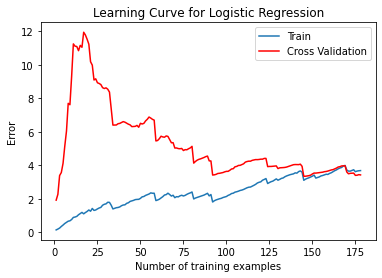

In [19]:
#Call learningCurve to compute E_train and E_validation
error_train, error_val = learningCurve(X_binary_train_norm, y_binary_train, X_binary_val_norm, y_binary_val, alpha, iterat, Lambda)

# Plot the training and validation errors
plt.plot(range(1,len(X_binary_train)+1),error_train)
plt.plot(range(1,len(X_binary_train)+1), error_val,color="r")
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend(["Train", "Cross Validation"])

In [20]:
def validationCurve (X, y, Xval, yval, learn_rate, num_iter, Lambda_array):

    """
    Returns the best lambda and the respective train and cross validation set errors
    """
    m = X.shape[0]  # Number of training examples 
    n = X.shape[1]  # number of features 
    mval = Xval.shape[0]  # Number of validation examples 
    
    error_train, error_val = [],[]
    
    for lam in Lambda_array:
        theta_ini=np.zeros((n,1))
        theta = gradientDescent( X, y, theta_ini, learn_rate, num_iter, lam)[0]
        pred_train = np.dot(X,theta)
        pred_val = np.dot(Xval,theta)
        error_train_i = 1/(2*m) * np.sum((pred_train - y)**2)
        error_val_i = 1/(2*mval) * np.sum((pred_val - yval)**2)
        error_train.append(error_train_i)
        error_val.append(error_val_i)
    
    ind = np.argmin(error_val)
    best_lambda=Lambda_array[ind]
        
    return best_lambda, error_train, error_val

Best lambda: 15
Train error: 1.2758990781716286
Cross validation error: 1.1887513297801944
Test error: 1.1887513297801944


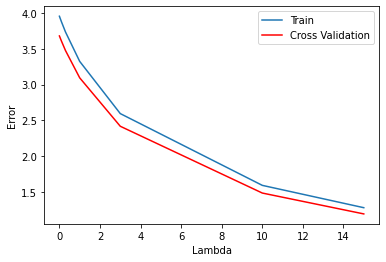

In [35]:
# Values of lambda to try
Lambda_array = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 15]

# Compute the best lambda value and the train and cross validation errors
best_lambda, error_train, error_val = validationCurve(X_binary_train_norm, y_binary_train, X_binary_val_norm, y_binary_val, alpha, iterat, Lambda_array)
print("Best lambda:", best_lambda)
# If we try bigger lambda values, we see that the error slowly decreases until ~300 and at this point the error
# starts slowly increasing. This way, using a small value like 15 or a bigger value like 300 is the same.

plt.plot(Lambda_array, error_train, label="Train")
plt.plot(Lambda_array, error_val, label="Cross Validation", color="r")
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.legend()


#for the best_lambda computed above, print the training (Etrain), validation (Eval) and test (Etest) errors

# inicialize all theta at 0. 
theta_ini = np.zeros((X_binary_train_norm.shape[1], 1))
#train the model with best_theta and the train set
theta_binary = gradientDescent(X_binary_train_norm, y_binary_train, theta_ini,  alpha, iterat, best_lambda)[0]

pred = np.dot(X_binary_train_norm, theta_binary)
Etrain = 1/(2*len(X_binary_train_norm)) * np.sum((pred - y_binary_train)**2)

pred_val = np.dot(X_binary_val_norm, theta_binary)
Eval = 1/(2*len(X_binary_val_norm)) * np.sum((pred_val - y_binary_val)**2)

pred_test = np.dot(X_binary_test_norm, theta_binary)
Etest = 1/(2*len(X_binary_test_norm)) * np.sum((pred_test - y_binary_test)**2)

print("Train error:", Etrain)
print("Cross validation error:", Eval)
print("Test error:", Etest)


## Testing the binary classifier
In this section, we will perform some tests on the binary classifier.
We predict the entire dataset examples to calculate the model accuracy, sensitivity, specificity, precision and F1 score.

Accuracy (binary):  0.8135593220338984
Sensitivity (binary):  0.76
Specificity (binary):  0.8529411764705882
Precision (binary):  0.7916666666666666
F1 score (binary):  0.7755102040816326


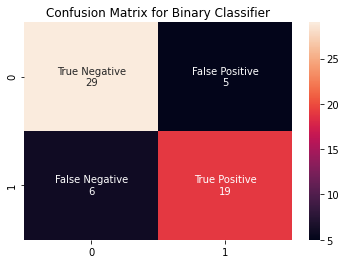

In [22]:
# Import libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

# y_binary_pred will contain the predictions for every example in the dataset
y_binary_pred = np.zeros((y_binary_test.shape[0], y_binary_test.shape[1]))

# For each example in the dataset, compute the prediction
for i in range(len(y_binary_test)):
    y_binary_pred[i] = classifierPredict(X_binary_test_norm[i], theta_binary)

# Compute the confusion matrix
cm_binary = confusion_matrix(y_binary_test, y_binary_pred)

# Obtain the true and false positives and negatives
tn_binary, fp_binary, fn_binary, tp_binary = cm_binary.ravel()

# Plot the confusion matrix in a graphical way
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_binary.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_binary, annot=labels, fmt="")
plt.title("Confusion Matrix for Binary Classifier")

# Compute the following parameters:
accuracy_binary = (tp_binary + tn_binary) / (tp_binary + tn_binary + fp_binary + fn_binary)
sensitivity_binary = (tp_binary) / (tp_binary + fn_binary)
specifity_binary = (tn_binary) / (tn_binary + fp_binary)
precision_binary = (tp_binary) / (tp_binary + fp_binary)
F1_binary = 2*(sensitivity_binary * precision_binary)/(sensitivity_binary+precision_binary)

print("Accuracy (binary): ", accuracy_binary)
print("Sensitivity (binary): ", sensitivity_binary)
print("Specificity (binary): ", specifity_binary)
print("Precision (binary): ", precision_binary)
print("F1 score (binary): ", F1_binary)


## Part 2 - Multiclass Classification
In this part, it is performed a multiclass classification.
The classifier is capable of predicting the type of disease from a set of 4 possible diseases.
The possible results are: 0 - absence of disease; 1 through 4 - the type of disease;

In [23]:
# Array with multiclass data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


(array([160.,   0.,  54.,   0.,   0.,  35.,   0.,  35.,   0.,  13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

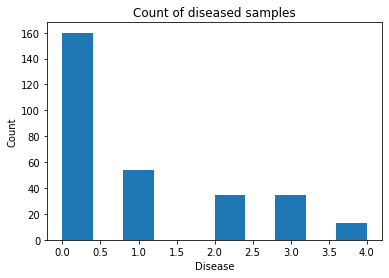

In [24]:
data_n = data.values
#print(data_n.shape)

# Extract the features to array X
X = data_n[:,:-1]

# Extract the labels to array y
y = data_n[:,-1]
y = y.reshape(len(y), 1)

#print(X.shape)
#print(y.shape)

# Plot the count of diseases
plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y)

(array([160.,   0., 160.,   0.,   0., 160.,   0., 160.,   0., 160.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

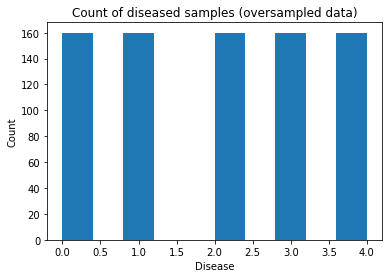

In [25]:
# Import libraries to perform random oversampling
import imblearn
from imblearn.over_sampling import RandomOverSampler

# Random oversampler
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_sample(X, y)
y_ros = y_ros.reshape(len(y_ros), 1)

#print(X_ros.shape)
#print(y_ros.shape)

# Plot the count of diseases
plt.title("Count of diseased samples (oversampled data)")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_ros)

In [26]:
# Normalize the features
X_norm, X_mean, X_std = featureNormalization(X)
X_ros_norm, X_ros_mean, X_ros_std = featureNormalization(X_ros)
#print(X_norm.shape)
#print(X_ros_norm.shape)

In [27]:
def trainMulticlassModel(X, y, alpha, iterat, Lambda):
    
    # Different classes
    Classes = np.unique(y)
    # Number of different classes
    nClasses = len(Classes)
    
    print("Class val (class id):")
    
    # Array to store all of the thetas computed for each class
    # Each column is a vector with the thetas of the correspondant class
    theta_all = np.zeros((X.shape[1], nClasses))
    
    # List to store the history of the cost of theta
    J_history_all = []
    
    # Iterate through each class
    for i in range(0, nClasses):
        
        print(Classes[i], "(", i, "),")
        
        # Make y_binary=1 for examples of the current class and y_binary=0 for examples of all other classes
        y_binary = y.copy()
        y_binary[y_binary != Classes[i]] = 0
        y_binary[y_binary == Classes[i]] = 1
        
        # Train the classifier for the current class (X, y_binary)
        initial_theta = np.zeros((X.shape[1],1))
        theta, J_history = gradientDescent(X, y_binary, initial_theta, alpha, math.floor(iterat/nClasses), Lambda)
        
        # Store the thetas of this class in theta_all
        theta_all[:,[i]] = theta
        
        # Store J_history in J_history_all
        J_history_all.extend(J_history)
        
    return theta_all, J_history_all

In [28]:
Lambda = 5
alpha = 0.1

# Number of iterations
iterat = 1000

# Compute the model parameters
theta , J_history = trainMulticlassModel(X_norm, y, alpha, iterat, Lambda)
theta_ros , J_history_ros = trainMulticlassModel(X_ros_norm, y_ros, alpha, iterat, Lambda)

#print(theta.shape)
# print(theta_ros.shape)

Class val (class id):
0.0 ( 0 ),
1.0 ( 1 ),
2.0 ( 2 ),
3.0 ( 3 ),
4.0 ( 4 ),
Class val (class id):
0.0 ( 0 ),
1.0 ( 1 ),
2.0 ( 2 ),
3.0 ( 3 ),
4.0 ( 4 ),


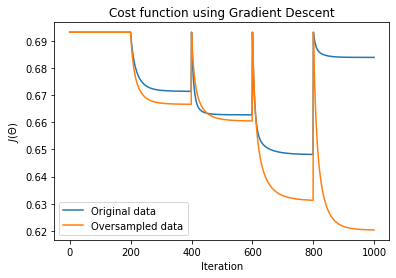

In [29]:
# Plot the evolution of the cost function to see if it converges
plt.plot(J_history, label='Original data')
plt.plot(J_history_ros, label='Oversampled data')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.legend()

In [30]:
def classifierPredictMulticlass(X, theta):
    """
    take in numpy array of X and theta, and predict the class
    """
    prob = sigmoid(np.dot(X,theta))

#     prob = np.dot(X,theta)
    predClass = []
    
#     for i in prob:
#         print(i)
#         predClass.append(np.argmax(i))
    
    predClass = np.argmax(prob)
    
    return predClass

In [31]:
# Array with the input features
X_test = np.array([ 63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0 ])
X_test = X_test.reshape(1, len(X_test))

#Normalize the values
X_test = (X_test - X_mean)/X_std

#Compute the prediction
pred = classifierPredictMulticlass(X_test, theta)

print("Predicted class: ", pred)

Predicted class:  1


## Testing the multiclass classifier
In this section, we will perform some tests on the multiclass classifier.
We predict the entire dataset examples to calculate the model accuracy.

Accuracy (multiclass):  0.42875


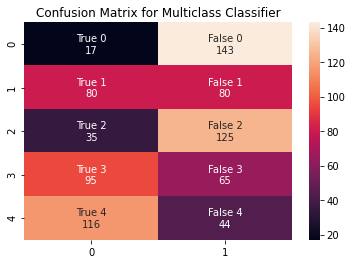

In [32]:
# y_pred will contain the predictions for every example in the dataset
y_pred = np.zeros((y_ros.shape[0], y_ros.shape[1]))

# For each example in the dataset, compute the prediction
for i in range(len(y_ros)):
    y_pred[i] = classifierPredictMulticlass(X_ros_norm[i], theta_ros)

# Compute the confusion matrix
cm = confusion_matrix(y_ros, y_pred)

# Obtain the true and false values for each prediction
t0 = cm[0][0]
f0 = cm[0][1]+cm[0][2]+cm[0][3]+cm[0][4]
t1 = cm[1][1]
f1 = cm[1][0]+cm[1][2]+cm[1][3]+cm[1][4]
t2 = cm[2][2]
f2 = cm[2][0]+cm[2][1]+cm[2][3]+cm[2][4]
t3 = cm[3][3]
f3 = cm[3][0]+cm[3][1]+cm[3][2]+cm[3][4]
t4 = cm[4][4]
f4 = cm[4][0]+cm[4][1]+cm[4][2]+cm[4][3]

correct_results_linear = t0 + t1 + t2 + t3 + t4
incorrect_results_linear = f0 + f1 + f2 + f3 + f4

cm = np.array([[t0, f0],[t1, f1],[t2, f2],[t3, f3],[t4, f4]])


# Plot the confusion matrix in a graphical way
group_names = ["True 0","False 0","True 1","False 1","True 2","False 2","True 3","False 3","True 4","False 4"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(5,2)
sns.heatmap(cm, annot=labels, fmt="")
plt.title("Confusion Matrix for Multiclass Classifier")

# Compute the following parameters:
accuracy = (t0 + t1 + t2 + t3 + t4) / (t0 + t1 + t2 + t3 + t4 + f0 + f1 + f2 + f3 + f4)

print("Accuracy (multiclass): ", accuracy)


Text(0.5, 1.0, 'Number of correct and incorrect results for multiclass classifier')

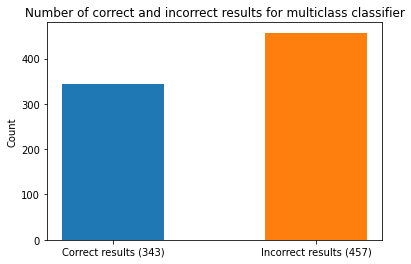

In [33]:
plt.bar("Correct results ("+str(correct_results_linear)+")",correct_results_linear,0.5)
plt.bar("Incorrect results ("+str(incorrect_results_linear)+")",incorrect_results_linear, 0.5)
plt.ylabel("Count")
plt.title("Number of correct and incorrect results for multiclass classifier")